In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance
import os
from tqdm import tqdm

In [18]:
seed = 42
path = 'D:/UserFolders/Enak/Documentos/I2A2/Curso 2020/Desafio - Bone Age Regression/'

In [19]:
os.mkdir(path+'/newimages/' )

In [3]:
train_df = pd.read_csv(path+'i2a2-bone-age-regression/train.csv')

In [4]:
train_df.head(20)

,fileName,patientSex,boneage
0,1377.png,F,180
1,1378.png,F,12
2,1379.png,F,94
3,1380.png,M,120
4,1381.png,F,82
5,1382.png,M,138
6,1383.png,M,150
7,1384.png,M,156
8,1385.png,M,36
9,1387.png,M,138


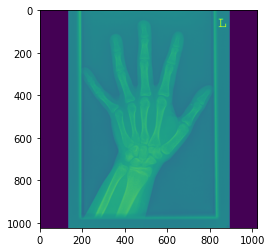

In [5]:
im = Image.open(path+'i2a2-bone-age-regression/images/1396.png').convert("L")
plt.imshow(im)
plt.show()

In [6]:
im_crop = im.crop((600,700,610,710))
im_arr = np.asarray(im_crop)
im_arr

array([[126, 126, 125, 127, 123, 123, 122, 119, 116, 112],
       [127, 124, 124, 125, 122, 121, 119, 117, 114, 108],
       [125, 124, 122, 123, 120, 118, 116, 113, 108, 102],
       [124, 121, 121, 119, 117, 115, 110, 104, 101, 100],
       [122, 119, 118, 114, 112, 108, 103, 100, 101, 101],
       [118, 118, 113, 109, 105, 102, 100, 101, 100, 101],
       [117, 112, 105, 102, 100, 101, 101, 101, 101, 101],
       [110, 104, 101, 100, 100, 101, 101, 101, 101, 102],
       [102, 100, 100, 101, 102, 101, 101, 101, 100, 102],
       [101, 100, 101, 101, 103, 103, 102, 101, 102, 102]], dtype=uint8)

In [7]:
im_arr = np.asarray(im)
np.mean(im_arr)
np.quantile(im_arr,0.75)

126.0

In [69]:
def del_blank(im):
    #print(im.getbbox())
    im_crop = im.crop(im.getbbox())
    #plt.imshow(im_crop)
    #plt.show()
    return im_crop

In [68]:
def contrast_enh(im_crop):
    enhancer = ImageEnhance.Contrast(im_crop)
    new_img2 = enhancer.enhance(2)
    #plt.imshow(new_img2)
    #plt.show()
    return new_img2

In [67]:
def img_rotate(new_img2):
    new_img3 = new_img2.rotate(15)
    #plt.imshow(new_img3)
    #plt.show()
    return new_img3

In [66]:
def get_col_row_max(new_img3):
    im_arr = np.asarray(new_img3)
    #print(im_arr.shape)
    column_sum = im_arr.sum(axis=0)
    #print(len(column_sum))
    row_sum = im_arr.sum(axis=1)
    col = np.argmax(column_sum)
    row = np.argmax(row_sum)
    #print(col,row)
    return col,row


In [65]:
def close_up(col, row, new_img3):
    im_arr = np.asarray(new_img3)
    box = (col-im_arr.shape[1]/2, row-im_arr.shape[1]/1.5, col+im_arr.shape[1]/2, row+im_arr.shape[1]/2.2)
    #print(box)
    im_crop2 = new_img3.crop(box)
    #plt.imshow(im_crop2)
    #plt.show()
    return im_crop2

In [64]:
def rotate_back(im_crop2,col,row): 
    im_crop3 = im_crop2.rotate(-15)
    #plt.plot(col,row)
    #plt.imshow(im_crop3)
    #plt.show()
    return im_crop3

In [63]:
def hand_id(im):
    im = del_blank(im)
    im = contrast_enh(im)
    im = img_rotate(im)
    col,row = get_col_row_max(im)
    #print(col,row)
    im = close_up(col, row, im)
    im = rotate_back(im,col,row)
    return im

In [71]:
new_images = []
for i in tqdm(train_df['fileName']):
    im = Image.open(path+'i2a2-bone-age-regression/images/'+i).convert("L")
    im = hand_id(im)
    #print(newfiles)
    im.save(path+'/newimages/'+i, "PNG")

100%|████████████████████████████████████████████████████████████████████████████| 12611/12611 [20:36<00:00, 10.20it/s]


In [32]:
train_df.loc[train_df.fileName == '1378.png','boneage']

1    12
Name: boneage, dtype: int64